<a href="https://colab.research.google.com/github/Dr-Isam-ALJAWARNEH/ds-project-thematic-maps/blob/main/code/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from shapely.geometry import Point
from fastai import *
from sklearn import metrics
from fastai.imports import *
from sklearn.ensemble import RandomForestRegressor
import geopandas as gpd

In [2]:
sns.set(rc={'figure.figsize':(13,8)})

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

Mounted at /content/drive


In [3]:
air =  pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv')
air.head().T

,0,1,2,3,4
SensorID,NYCP1_01A,NYCP1_01A,NYCP1_01A,NYCP1_01A,NYCP1_01A
time,1579618560,1579618560,1579618560,1579618560,1579618560
latitude,40.847183,40.847183,40.847179,40.847179,40.847179
longitude,-73.870087,-73.870094,-73.870094,-73.870094,-73.870094
bin0,23,18,18,18,20
bin1,1,2,1,1,3
bin2,2,1,0,2,0
bin3,0,0,0,0,2
bin4,0,0,0,0,2
bin5,0,0,0,0,0


In [ ]:
'''air =  pd.read_csv('/content/drive/MyDrive/foundation_of_DS/project/Data/NYC_air_quality_1.csv')
air.head().T'''

In [4]:
air['time'] = air['time'].astype('int').astype("datetime64[s]")
air.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10
0,NYCP1_01A,2020-01-21 14:56:00,40.847183,-73.870087,23,1,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,16.3,15.2,1.44,5.91,11.35
1,NYCP1_01A,2020-01-21 14:56:00,40.847183,-73.870094,18,2,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,16.2,15.1,1.05,1.18,1.18
2,NYCP1_01A,2020-01-21 14:56:00,40.847179,-73.870094,18,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,16.1,15.1,0.74,0.76,0.76
3,NYCP1_01A,2020-01-21 14:56:00,40.847179,-73.870094,18,1,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,16.1,15.2,1.15,4.48,47.36
4,NYCP1_01A,2020-01-21 14:56:00,40.847179,-73.870094,20,3,0,2,2,0,...,0.0,0.0,0.0,0.0,0.0,16.0,15.2,2.13,5.77,6.18


In [5]:
air2 = (air[['pm25', 'time', 'latitude','longitude', 'temperature', 'humidity']]).copy(deep=True)

air2.head()

,pm25,time,latitude,longitude,temperature,humidity
0,5.91,2020-01-21 14:56:00,40.847183,-73.870087,16.3,15.2
1,1.18,2020-01-21 14:56:00,40.847183,-73.870094,16.2,15.1
2,0.76,2020-01-21 14:56:00,40.847179,-73.870094,16.1,15.1
3,4.48,2020-01-21 14:56:00,40.847179,-73.870094,16.1,15.2
4,5.77,2020-01-21 14:56:00,40.847179,-73.870094,16.0,15.2


In [ ]:
#add_datepart(air2, 'time', time=True)
#air2.head()

PM2.5 values and their occurance rate

<ipython-input-6-06ca7388eaef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(air2.pm25)


<Axes: xlabel='pm25', ylabel='Density'>

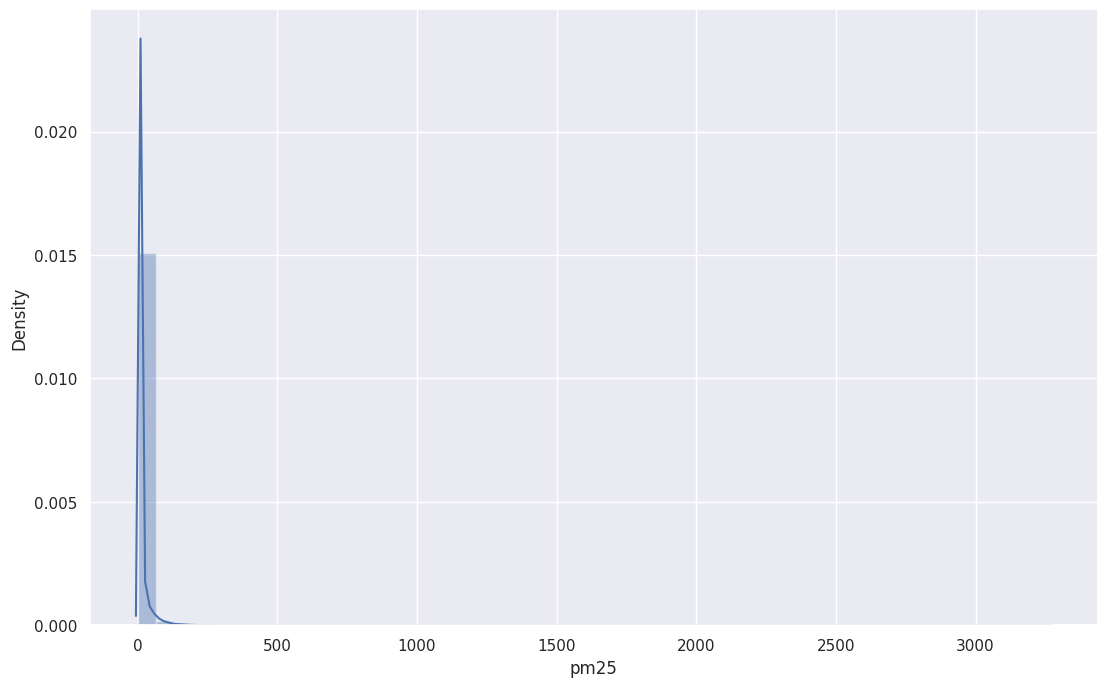

In [6]:
sns.distplot(air2.pm25)

In [7]:
hoods = gpd.read_file("https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson")
hoods.head()

,neighborhood,boroughCode,borough,@id,geometry
0,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Allerton,"POLYGON ((-73.84860 40.87167, -73.84582 40.87024, -73.85456 40.85995, -73.85467 40.85959, -73.85639 40.85759, -73.86888 40.85722, -73.86832 40.85786, -73.86955 40.85778, -73.87102 40.85731, -73.87048 40.86541, -73.87055 40.86970, -73.86722 40.86969, -73.85745 40.86953, -73.85555 40.87181, -73.85360 40.87329, -73.84860 40.87167))"
1,Alley Pond Park,4,Queens,http://nyc.pediacities.com/Resource/Neighborhood/Alley_Pond_Park,"POLYGON ((-73.74333 40.73888, -73.74371 40.73940, -73.74402 40.74077, -73.74990 40.73977, -73.75145 40.74023, -73.75349 40.74239, -73.74844 40.74334, -73.74573 40.74295, -73.74476 40.74333, -73.74648 40.74685, -73.74376 40.74756, -73.74410 40.74819, -73.74566 40.75158, -73.74602 40.75266, -73.74751 40.75614, -73.75046 40.75939, -73.75242 40.76009, -73.75348 40.75881, -73.75645 40.75889, -73.75798 40.75866, -73.75978 40.75785, -73.76067 40.75699, -73.76073 40.75590, -73.76015 40.75505, -73.76067 40.75487, -73.76142 40.75574, -73.76131 40.75696, -73.76166 40.75815, -73.76093 40.75903, -73.75..."
2,Arden Heights,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Arden_Heights,"POLYGON ((-74.16983 40.56108, -74.16982 40.56106, -74.16707 40.54821, -74.16692 40.54794, -74.16689 40.54785, -74.16685 40.54782, -74.16683 40.54778, -74.16623 40.54734, -74.16530 40.54427, -74.16992 40.54223, -74.17728 40.54063, -74.17733 40.54062, -74.17740 40.54248, -74.17650 40.54449, -74.18072 40.54667, -74.17959 40.54807, -74.17881 40.54966, -74.17933 40.54989, -74.18209 40.55110, -74.18318 40.55520, -74.18464 40.55381, -74.18551 40.55424, -74.18566 40.55410, -74.18609 40.55455, -74.18827 40.55328, -74.18781 40.55282, -74.18707 40.55242, -74.18858 40.55071, -74.18932 40.55113, -74.19..."
3,Arlington,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Arlington,"POLYGON ((-74.15975 40.64142, -74.15998 40.64145, -74.16037 40.64158, -74.16111 40.64184, -74.16118 40.64201, -74.16135 40.64350, -74.16146 40.64429, -74.16146 40.64429, -74.15799 40.64386, -74.15743 40.64330, -74.15755 40.64325, -74.15792 40.64308, -74.15813 40.64263, -74.15828 40.64256, -74.15840 40.64254, -74.15848 40.64254, -74.15855 40.64250, -74.15858 40.64243, -74.15866 40.64231, -74.15874 40.64200, -74.15881 40.64176, -74.15920 40.64165, -74.15946 40.64145, -74.15975 40.64142))"
4,Arrochar,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Arrochar,"POLYGON ((-74.06078 40.59319, -74.06079 40.59318, -74.06215 40.59203, -74.06304 40.59109, -74.06503 40.58899, -74.06448 40.58840, -74.06436 40.58827, -74.06452 40.58835, -74.06478 40.58849, -74.06720 40.58675, -74.06722 40.58673, -74.06942 40.58465, -74.07048 40.58508, -74.08024 40.59007, -74.08241 40.59321, -74.08375 40.59549, -74.08588 40.59589, -74.08559 40.59658, -74.08551 40.59678, -74.08537 40.59691, -74.08494 40.59731, -74.08481 40.59744, -74.08474 40.59746, -74.08171 40.59856, -74.07716 40.59839, -74.07490 40.59761, -74.07387 40.59764, -74.07362 40.59721, -74.06464 40.60018, -74.06..."


In [ ]:
'''hoods = gpd.read_file("/content/drive/MyDrive/foundation_of_DS/project/Data/nyc_polygon.geojson")
hoods.head()'''

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(-74.28337047811634, -73.67222994890717, 40.47516404814232, 40.93650271647487)

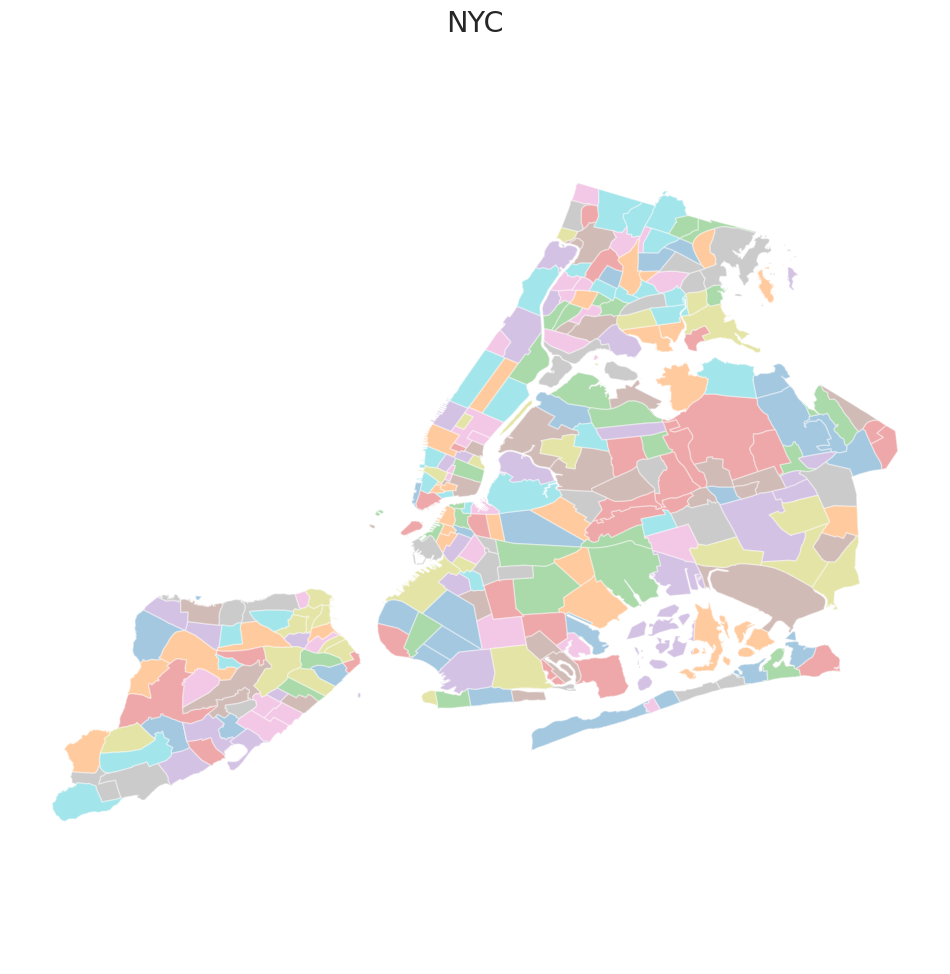

In [8]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

hoods = hoods.to_crs({'init': 'epsg:4326'})

ax = hoods.plot(column = "neighborhood", figsize = (12, 12), alpha = 0.4)

ax.axis('off')
ax.set_title("NYC", fontsize='xx-large')
ax.axis('equal')

In [ ]:
!pip install folium
!pip install uszipcode
%pip install pygeohash
!pip install geopandas

join the geojson and csv

In [10]:
import pygeohash as gh

sampling_fraction = 0.6
geohash_precision = 6

air2['geohash']=air2.apply(lambda x: gh.encode(x.latitude, x.longitude, precision=geohash_precision), axis=1)

import geopandas as gpd
gdf_NYCAir = gpd.GeoDataFrame(air2,   geometry=gpd.points_from_xy(air2.longitude, air2.latitude))

gdf_NYCAir = gdf_NYCAir.set_crs('epsg:4326')
gdf_NYCAir.head(2)

,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry
0,5.91,2020-01-21 14:56:00,40.847183,-73.870087,16.3,15.2,dr72rh,POINT (-73.87009 40.84718)
1,1.18,2020-01-21 14:56:00,40.847183,-73.870094,16.2,15.1,dr72rh,POINT (-73.87009 40.84718)


In [11]:
sjoined_NYCAir_original = gpd.sjoin(gdf_NYCAir, hoods, predicate="within")
sjoined_NYCAir_original.head(2)

<ipython-input-11-c6a9e32a779a>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  sjoined_NYCAir_original = gpd.sjoin(gdf_NYCAir, hoods, predicate="within")


,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id
0,5.91,2020-01-21 14:56:00,40.847183,-73.870087,16.3,15.2,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
1,1.18,2020-01-21 14:56:00,40.847183,-73.870094,16.2,15.1,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park


In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [13]:
df = pd.DataFrame(sjoined_NYCAir_original)
df

,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id
0,5.91,2020-01-21 14:56:00,40.847183,-73.870087,16.3,15.2,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
1,1.18,2020-01-21 14:56:00,40.847183,-73.870094,16.2,15.1,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
2,0.76,2020-01-21 14:56:00,40.847179,-73.870094,16.1,15.1,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
3,4.48,2020-01-21 14:56:00,40.847179,-73.870094,16.1,15.2,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
4,5.77,2020-01-21 14:56:00,40.847179,-73.870094,16.0,15.2,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116384,69.08,2020-02-13 15:08:00,40.834488,-73.897141,4.1,102.8,dr72q3,POINT (-73.89714 40.83449),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park
116385,57.78,2020-02-13 15:08:00,40.834488,-73.897141,4.1,102.8,dr72q3,POINT (-73.89714 40.83449),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park
116386,57.46,2020-02-13 15:08:00,40.834488,-73.897141,4.1,102.8,dr72q3,POINT (-73.89714 40.83449),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park
116387,0.74,2020-02-13 15:08:00,40.834415,-73.897072,4.1,102.8,dr72q3,POINT (-73.89707 40.83441),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park


In [14]:
import datetime as dt

df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df

,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id,day,hour,month,year
0,5.91,2020-01-21 14:56:00,40.847183,-73.870087,16.3,15.2,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,21,14,1,2020
1,1.18,2020-01-21 14:56:00,40.847183,-73.870094,16.2,15.1,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,21,14,1,2020
2,0.76,2020-01-21 14:56:00,40.847179,-73.870094,16.1,15.1,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,21,14,1,2020
3,4.48,2020-01-21 14:56:00,40.847179,-73.870094,16.1,15.2,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,21,14,1,2020
4,5.77,2020-01-21 14:56:00,40.847179,-73.870094,16.0,15.2,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,21,14,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116384,69.08,2020-02-13 15:08:00,40.834488,-73.897141,4.1,102.8,dr72q3,POINT (-73.89714 40.83449),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park,13,15,2,2020
116385,57.78,2020-02-13 15:08:00,40.834488,-73.897141,4.1,102.8,dr72q3,POINT (-73.89714 40.83449),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park,13,15,2,2020
116386,57.46,2020-02-13 15:08:00,40.834488,-73.897141,4.1,102.8,dr72q3,POINT (-73.89714 40.83449),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park,13,15,2,2020
116387,0.74,2020-02-13 15:08:00,40.834415,-73.897072,4.1,102.8,dr72q3,POINT (-73.89707 40.83441),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park,13,15,2,2020


In [ ]:
%%time
!apt update
!apt upgrade
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes
# Install Folium for Geographic data visualization
!pip install folium

In [16]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import folium
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point

convert to geodataframe

In [17]:
gdf = GeoDataFrame(df, crs="EPSG:4326", geometry=df["geometry"])
gdf

,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id,day,hour,month,year
0,5.91,2020-01-21 14:56:00,40.847183,-73.870087,16.3,15.2,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,21,14,1,2020
1,1.18,2020-01-21 14:56:00,40.847183,-73.870094,16.2,15.1,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,21,14,1,2020
2,0.76,2020-01-21 14:56:00,40.847179,-73.870094,16.1,15.1,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,21,14,1,2020
3,4.48,2020-01-21 14:56:00,40.847179,-73.870094,16.1,15.2,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,21,14,1,2020
4,5.77,2020-01-21 14:56:00,40.847179,-73.870094,16.0,15.2,dr72rh,POINT (-73.87009 40.84718),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,21,14,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116384,69.08,2020-02-13 15:08:00,40.834488,-73.897141,4.1,102.8,dr72q3,POINT (-73.89714 40.83449),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park,13,15,2,2020
116385,57.78,2020-02-13 15:08:00,40.834488,-73.897141,4.1,102.8,dr72q3,POINT (-73.89714 40.83449),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park,13,15,2,2020
116386,57.46,2020-02-13 15:08:00,40.834488,-73.897141,4.1,102.8,dr72q3,POINT (-73.89714 40.83449),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park,13,15,2,2020
116387,0.74,2020-02-13 15:08:00,40.834415,-73.897072,4.1,102.8,dr72q3,POINT (-73.89707 40.83441),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park,13,15,2,2020


visualizing how different projections transform data

1)

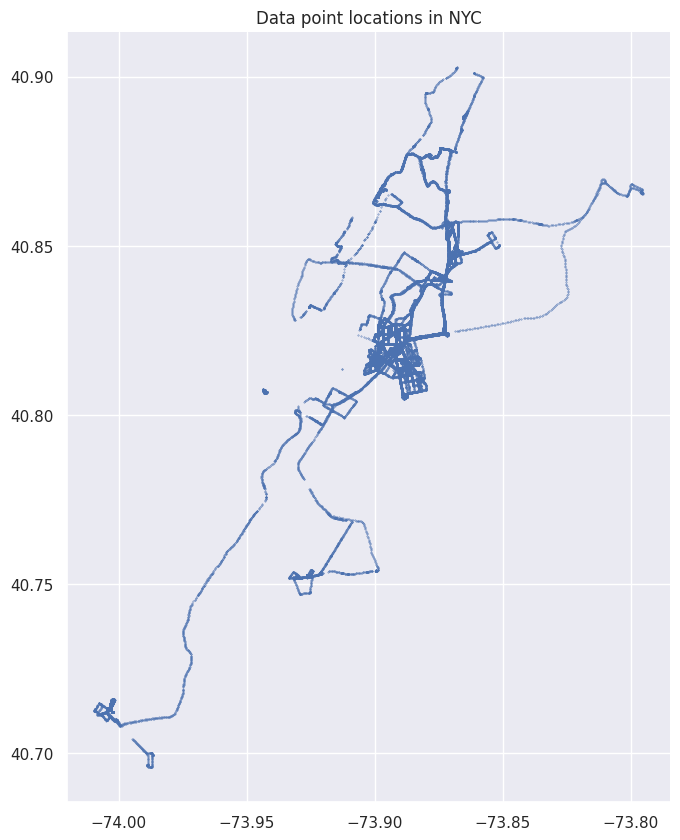

In [18]:
fig, ax = plt.subplots(figsize=(12,10))
gdf.plot(markersize=0.1,ax=ax);
ax.set_title('Data point locations in NYC')
plt.show()

2)

In [19]:
nyc_gdf_proj = gdf.to_crs({'init': 'epsg:32618'})
nyc_gdf_proj.tail()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id,day,hour,month,year
116384,69.08,2020-02-13 15:08:00,40.834488,-73.897141,4.1,102.8,dr72q3,POINT (592984.608 4520969.122),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park,13,15,2,2020
116385,57.78,2020-02-13 15:08:00,40.834488,-73.897141,4.1,102.8,dr72q3,POINT (592984.608 4520969.122),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park,13,15,2,2020
116386,57.46,2020-02-13 15:08:00,40.834488,-73.897141,4.1,102.8,dr72q3,POINT (592984.608 4520969.122),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park,13,15,2,2020
116387,0.74,2020-02-13 15:08:00,40.834415,-73.897072,4.1,102.8,dr72q3,POINT (592990.528 4520961.092),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park,13,15,2,2020
116388,44.11,2020-02-13 15:08:00,40.834480,-73.897133,4.1,102.8,dr72q3,POINT (592985.294 4520968.243),71,Crotona Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Crotona_Park,13,15,2,2020


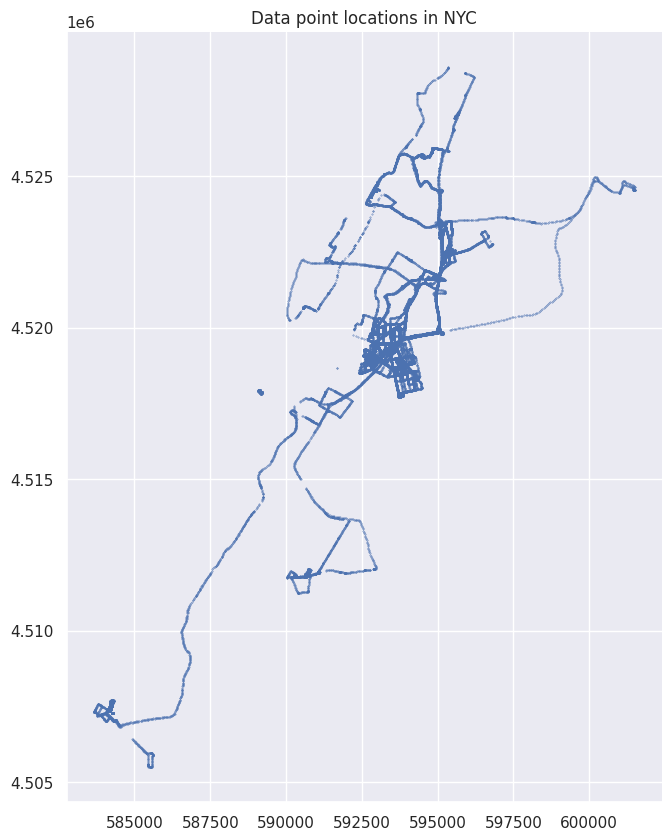

In [20]:
fig, ax = plt.subplots(figsize=(12,10))
nyc_gdf_proj.plot(markersize=0.1,ax=ax);
ax.set_title('Data point locations in NYC')
plt.show()

choose data subset

In [21]:
neighborhoodcp = nyc_gdf_proj[nyc_gdf_proj['neighborhood']== 'Clason Point']
neighborhoodcp

,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id,day,hour,month,year


create buffer

In [22]:
point1 = neighborhoodcp[:1]
buf10 = point1.buffer(10)
buf50 = point1.buffer(50)
buf100 = point1.buffer(100)

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:409: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


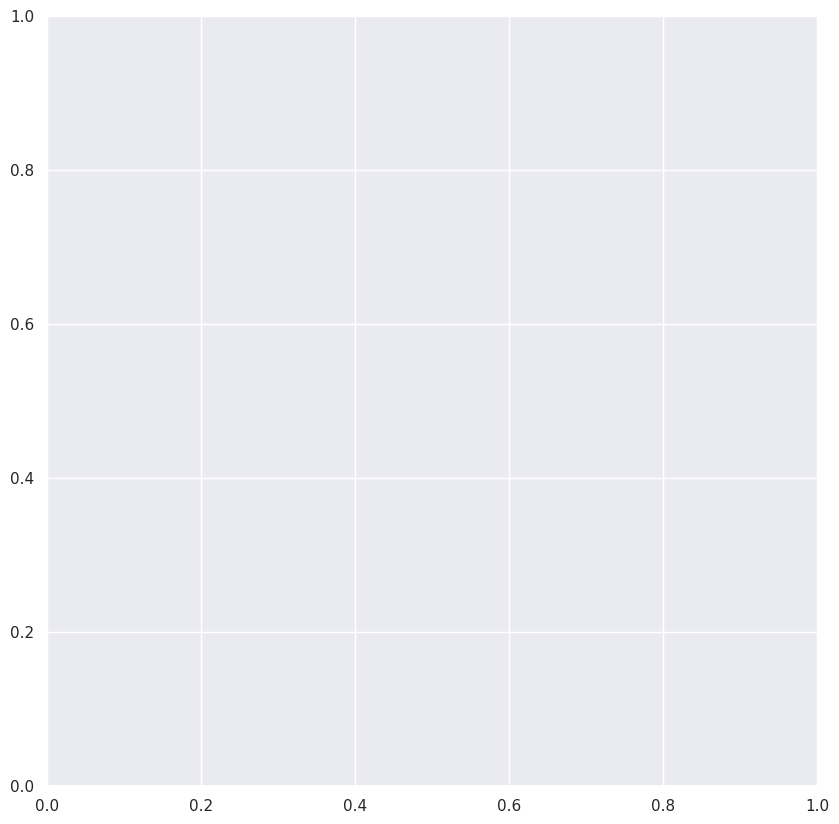

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
buf100.plot(color = 'red', ax=ax);
buf50.plot(ax=ax, color='yellow')
buf10.plot(ax=ax, color='gray');
point1.plot(ax=ax, color='black')
plt.show()

visualize subset

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


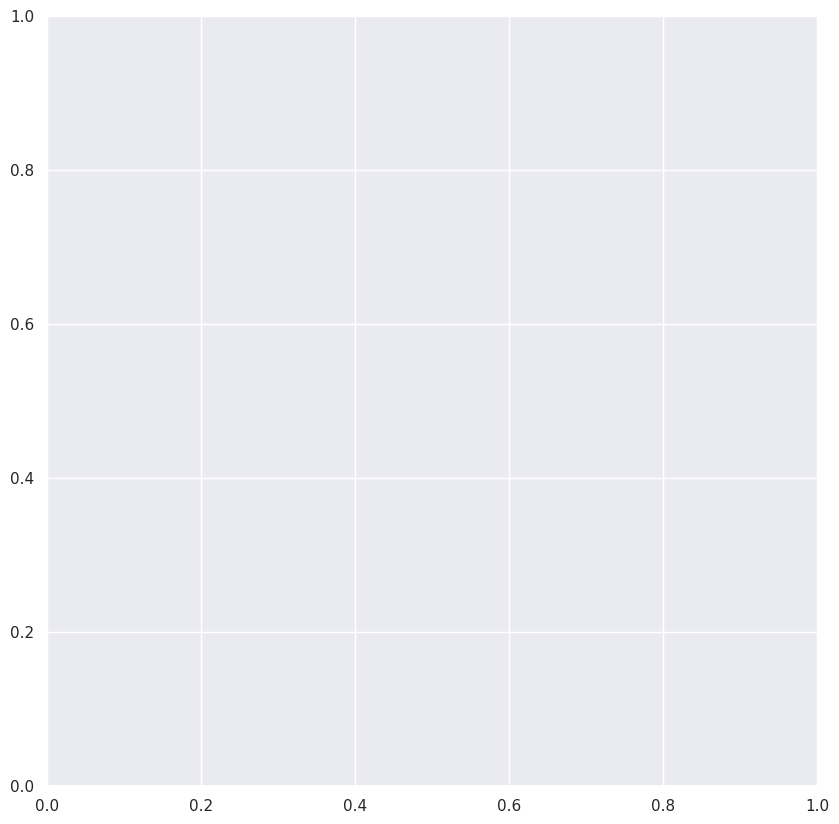

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))
neighborhoodcp.plot(ax=ax)
plt.show()

visualize buffered subset

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:409: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


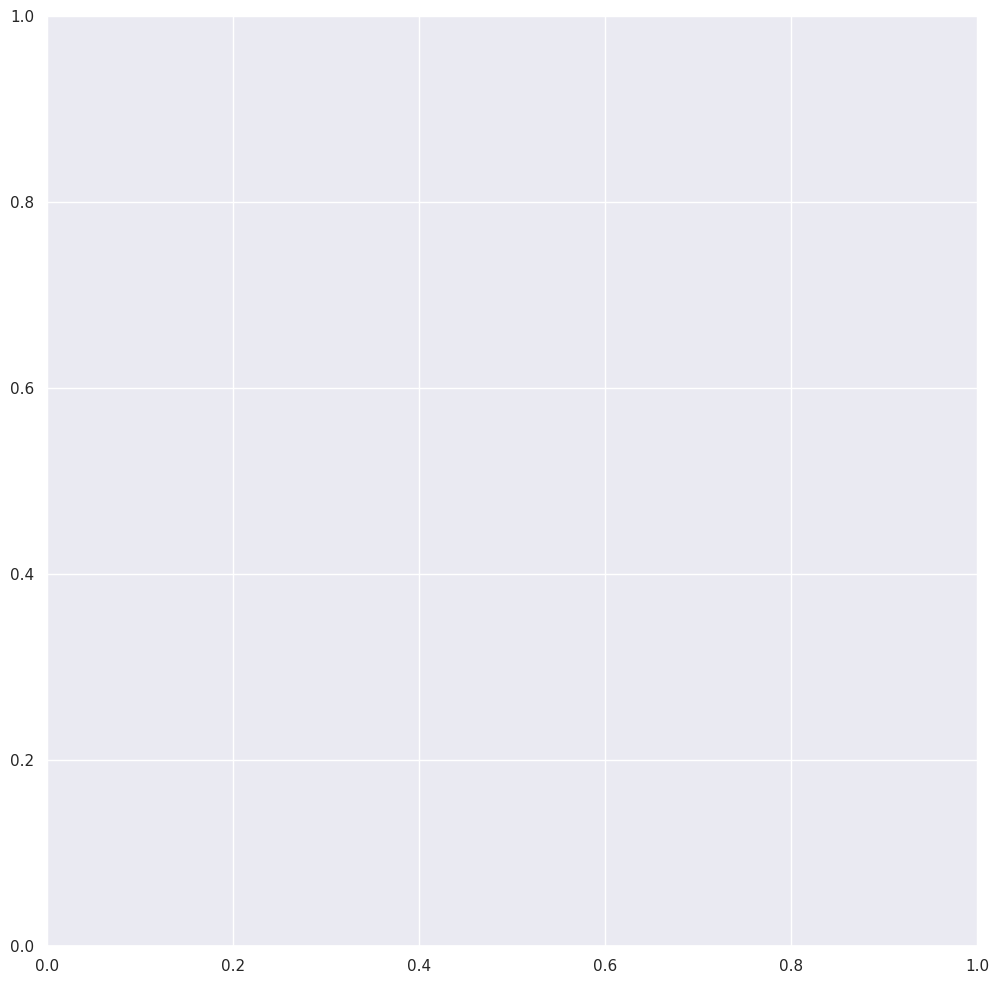

In [25]:
fig, ax = plt.subplots(figsize=(12, 10))
neighborhoodcp.buffer(20).plot(ax=ax, facecolor='grey',edgecolor='lightblue', alpha=0.01)
plt.tight_layout()
plt.show()

remove non numerical columns

In [26]:
df = df.drop(columns=['time', 'geohash', 'geometry', 'borough', 'neighborhood', '@id','latitude', 'longitude'])
df

,pm25,temperature,humidity,index_right,boroughCode,day,hour,month,year
0,5.91,16.3,15.2,38,2,21,14,1,2020
1,1.18,16.2,15.1,38,2,21,14,1,2020
2,0.76,16.1,15.1,38,2,21,14,1,2020
3,4.48,16.1,15.2,38,2,21,14,1,2020
4,5.77,16.0,15.2,38,2,21,14,1,2020
...,...,...,...,...,...,...,...,...,...
116384,69.08,4.1,102.8,71,2,13,15,2,2020
116385,57.78,4.1,102.8,71,2,13,15,2,2020
116386,57.46,4.1,102.8,71,2,13,15,2,2020
116387,0.74,4.1,102.8,71,2,13,15,2,2020


create train/test split and scale the predictors with the StandardScaler class:

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('pm25', axis=1)
y = df['pm25']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Using Principal Component Analysis (PCA) to determine feature importance
1) fit PCA to our scaled data
2) plot a line plot of the cumulative explained variance:

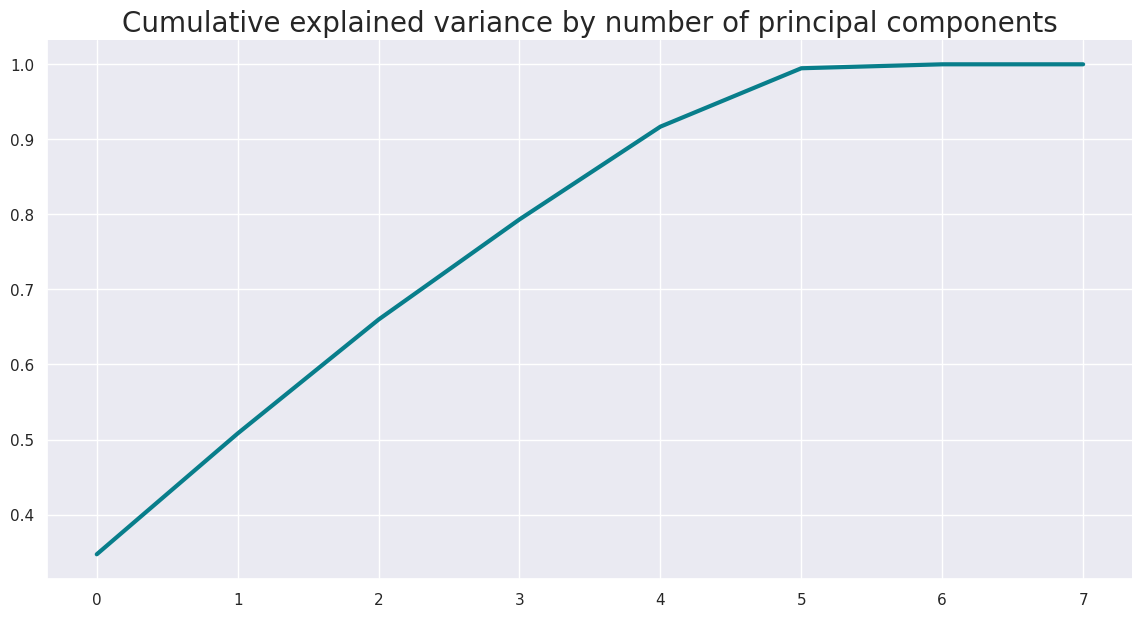

In [28]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

We learn that using 4 principal components, 90% of the dataset's variance could be explained.

computing loading scores:

In [29]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
temperature,0.043862,0.206629,0.734252,0.633480,0.067491,0.102046,-0.000520,0.0
humidity,0.697102,-0.233742,-0.202425,0.058785,0.306458,0.566241,-0.021154,0.0
index_right,0.244292,-0.614760,-0.082182,0.319194,-0.673586,0.006396,0.002376,0.0
boroughCode,-0.176222,-0.781470,0.210322,0.010818,0.504526,-0.243612,-0.004106,0.0
day,-0.914840,-0.085023,-0.207361,0.188758,0.059254,0.238081,0.130492,0.0


PC1 explains +50% of the variance in the data. With the others explaining less and less. This makes PC1 very the most important. There is an 85% negative correlation between PC1 and temperature.

Correlations between all of the input features and the first principal components:

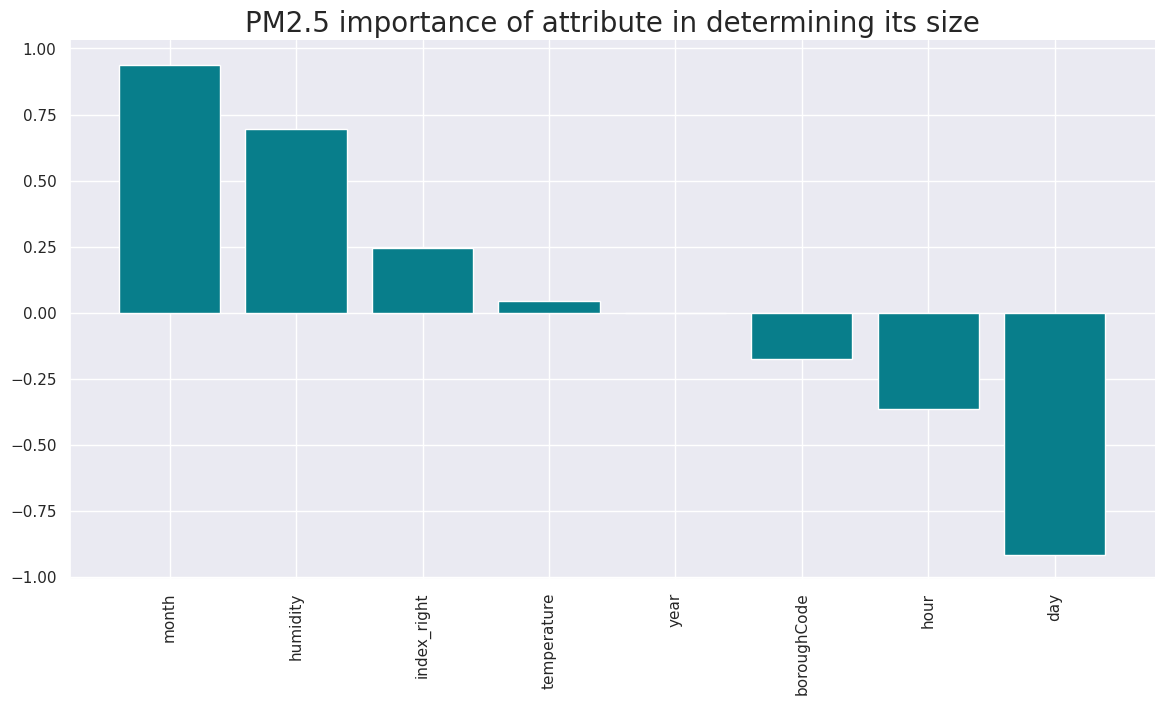

In [30]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PM2.5 importance of attribute in determining its size', size=20)
plt.xticks(rotation='vertical')
plt.show()